# socialbility analysis

The goal of this notebook is to take in csv output files from the tracking softwear Anymaze and preform analysis of behavioral data. This notebook aims to create a pipeline for analyzing data collected during my project investigating social prefrence (eg socialbility) and novelty prefrence (social memory).

write code to run t-test
calculate summary stats
plot data in a bar graph
plot lines for each data point

In [94]:
import pandas as pd
from scipy.stats import ttest_ind
from pathlib import Path
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

In [100]:
# Set the path to the folder containing your Excel files
folder_path = glob.glob(r"D:\Sequioa\anymaze_data\cage*.csv")

In [101]:
folder_path

['D:\\Sequioa\\anymaze_data\\cage_1_soc_day_1_3.csv',
 'D:\\Sequioa\\anymaze_data\\cage_2_soc_day_2_4.csv']

In [102]:
soc = []
# Loop through each file
for file in folder_path:
    # Read the Excel file
    df = pd.read_csv(file)
# Loop through each file and rename columns 
    for columns in df.columns:
        if 'time investigating' in columns:
            print(columns)
            df = df.rename(columns = {columns: "_".join(columns.split(" ")[0:2]).lower()})
    soc.append(df)    


Social Agent Left : time investigating (s)
Empty Cup Right : time investigating (s)
Social Agent on the Right : time investigating (s)
Empty Cup Left : time investigating (s)


In [104]:
soc = pd.concat(soc) 

#soc_cagemate = soc[soc['Animal Notes'] == 'cagemate']
#i want a new dataframe that is the old dataframe new_df = old_df[filter]
#but i want my old df with a filter old_df[old_df[column_of_interest] == what_youu_want]
#filter = old_df[column_of_interest] == what_youu_want

In [105]:
# Initialize an empty list to store t-test results
t_test_results = [] 
#Perform t-test comparing columns E and F
t_stat, p_value = ttest_ind(soc['social_agent'], soc['empty_cup'])

t_test_results.append([t_stat, p_value])

In [106]:
# Initialize an empty list to store t-test results
caeg_mate_t_test_results = [] 
#Perform t-test comparing columns E and F
t_stat, p_value = ttest_ind(soc['social_agent'], soc['empty_cup'])

In [107]:
t_stat, p_value

(2.198937178763291, 0.03573131085057752)

In [108]:
t_test_results

[[2.198937178763291, 0.03573131085057752]]

# Summary Stats

In [111]:
# prompt: I need to plot the average of social_agent v empty_cup in a bar graph with SEM

# Calculate the average of social_agent and empty_cup
avg_social_agent = soc['social_agent'].mean()
avg_empty_cup = soc['empty_cup'].mean()

# Calculate the standard error of the mean (SEM) for social_agent and empty_cup
sem_social_agent = soc['social_agent'].sem()
sem_empty_cup = soc['empty_cup'].sem()

In [112]:
# Prepare data for bar plot
x = np.array([1, 2])
y = np.array([avg_social_agent, avg_empty_cup])
yerr = np.array([sem_social_agent, sem_empty_cup])
labels = ['Social Agent', 'Empty Cup']

Text(1, 52.3625, '*')

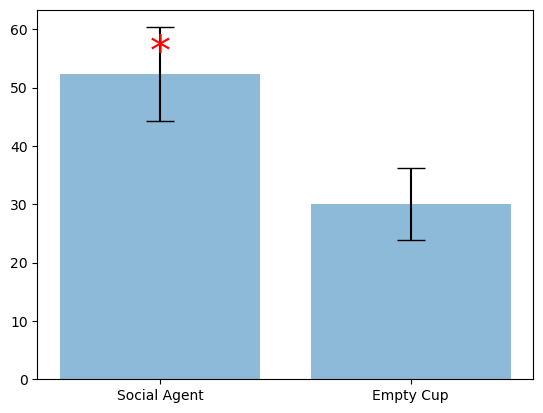

In [124]:
# Create the bar plot
plt.bar(x, y, yerr=yerr, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.xticks(x, labels)
social_agent = soc.loc[:, 'social_agent' ]  # Values from the first column
empty_cup = soc.loc[:, 'empty_cup']  # Values from the second column
x_values = [1, 2]  # x values for each row

# Add significance markers
plt.text(x[0], y[0] + 0.05, "*", ha='center', va='bottom', color='red', fontsize=30)
# Adjust the position (e.g., +0.05) and font size as needed

KeyError: 8

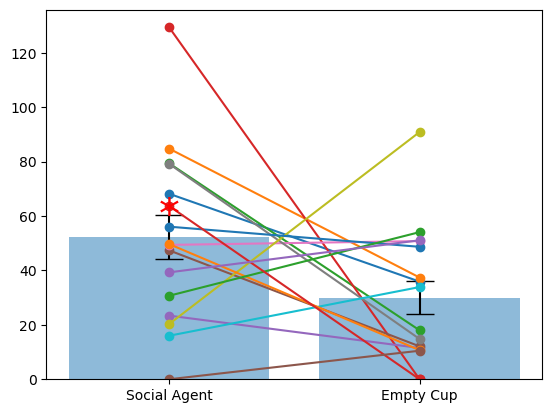

In [126]:
# Create the bar plot
plt.bar(x, y, yerr=yerr, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.xticks(x, labels)
social_agent = soc.loc[:, 'social_agent' ]  # Values from the first column
empty_cup = soc.loc[:, 'empty_cup']  # Values from the second column
x_values = [1, 2]  # x values for each row

# Add significance markers
plt.text(x[0], y[0] + 0.05, "*", ha='center', va='bottom', color='red', fontsize=30)
# Adjust the position (e.g., +0.05) and font size as needed


# Plot each row as a separate line
# for i in range(len(combined_df)): Iterate over each index (row) in the combined DataFrame (combined_df) using a for loop.
# The loop iterates over a range of indices from 0 to the length of the DataFrame minus 1.
# It allows access to each row of the DataFrame, one at a time, with the variable i representing the index.
# plt.plot(x_values, [social_agent[i], empty_cup[i]], marker='o', label=f'Line {i+1}'): Plot a point for each time point (x_values) with corresponding values from the social_agent and empty_cup arrays.
# Each point is marked with a circular marker ('o').
# The label for each line is generated dynamically using the index (i+1) to represent different lines.

for i in range(len(soc)):
    plt.plot(x_values, [social_agent[i], empty_cup[i]], marker='o', label=f'Line {i+1}')
plt.ylabel('Average Time Investigating (s)')
plt.title('Comparison of Social Agent vs. Empty Cup Investigation Time')
plt.show()


In [127]:
# prompt: now i want to filter my combind_df based on the Animal notes column 

# Filter the soc based on the Animal notes column
cagemates = soc[soc['Animal notes'] == 'Cagemate']
familiar = soc[soc['Animal notes'] == 'Familiar']

# Perform t-tests comparing cagemate vs. empty and familiar vs. empty
t_stat_cagemate, p_value_cagemate = ttest_ind(cagemates['social_agent'], cagemates['empty_cup'])
t_stat_familiar, p_value_familiar = ttest_ind(familiar['social_agent'], familiar['empty_cup'])

# Print the results
print("Cagemate vs. Empty:")
print("t-statistic:", t_stat_cagemate)
print("p-value:", p_value_cagemate)

print("\nFamiliar vs. Empty:")
print("t-statistic:", t_stat_familiar)
print("p-value:", p_value_familiar)


Cagemate vs. Empty:
t-statistic: 0.4833133544720802
p-value: 0.6363445456770658

Familiar vs. Empty:
t-statistic: 2.75991569824763
p-value: 0.015343254212607405


In [131]:
# prompt: i want to calculate the mean of cagemates and familiar

# Calculate the mean of cagemates
cagemate_mean = cagemates['social_agent'].mean()

# Calculate the mean of familiar
familiar_mean = familiar['social_agent'].mean()

# Print the results
print("Cagemate mean:", cagemate_mean)
print("Familiar mean:", familiar_mean)

cagemate_sem = cagemates['social_agent'].sem()
familiar_sem = familiar['social_agent'].sem()

print('cagemate sem', cagemate_sem)
print('familiar sem', familiar_sem)

Cagemate mean: 40.25
Familiar mean: 64.375
cagemate sem 9.543902316587875
familiar sem 11.9626912583606


KeyError: 8

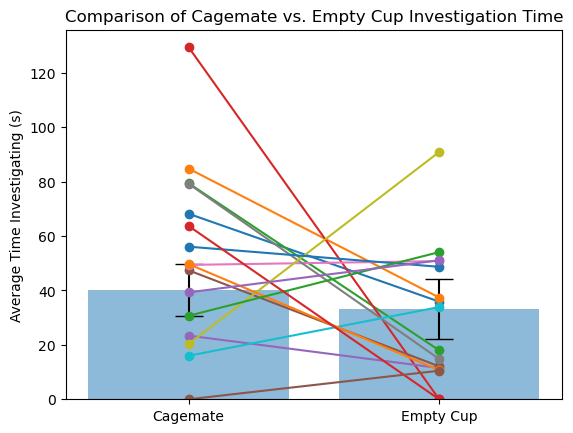

In [133]:
# Prepare data for bar plot
x = np.array([1, 2])
y = np.array([cagemate_mean, cagemates['empty_cup'].mean()])
yerr = np.array([cagemate_sem, cagemates['empty_cup'].sem()])
labels = ['Cagemate', 'Empty Cup']

# Create the bar plot
plt.bar(x, y, yerr=yerr, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.xticks(x, labels)

# Add title and labels
plt.ylabel('Average Time Investigating (s)')
plt.title('Comparison of Cagemate vs. Empty Cup Investigation Time')

for i in range(len(soc)):
    plt.plot(x_values, [social_agent[i], empty_cup[i]], marker='o', label=f'Line {i+1}')
plt.ylabel('Average Time Investigating (s)')
plt.title('Comparison of Social Agent vs. Empty Cup Investigation Time')
plt.show()
# Show the plot
plt.show()


KeyError: 8

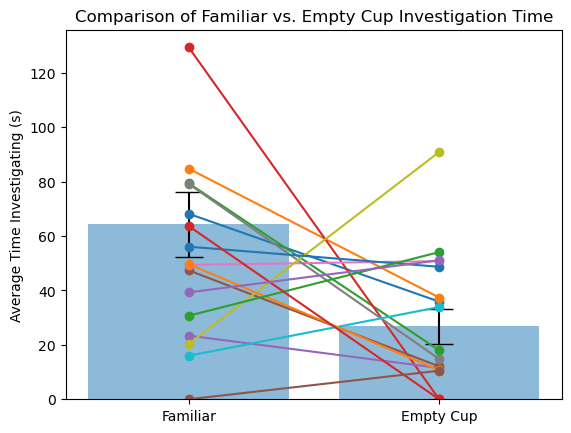

In [136]:
# Prepare data for bar plot
x = np.array([1, 2])
y = np.array([familiar_mean, familiar['empty_cup'].mean()])
yerr = np.array([familiar_sem, familiar['empty_cup'].sem()])
labels = ['Familiar', 'Empty Cup']

# Create the bar plot
plt.bar(x, y, yerr=yerr, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.xticks(x, labels)

# Add title and labels
plt.ylabel('Average Time Investigating (s)')
plt.title('Comparison of Familiar vs. Empty Cup Investigation Time')
for i in range(len(soc)):
    plt.plot(x_values, [social_agent[i], empty_cup[i]], marker='o', label=f'Line {i+1}')
plt.ylabel('Average Time Investigating (s)')
plt.title('Comparison of Social Agent vs. Empty Cup Investigation Time')
plt.show()
# Show the plot
plt.show()


# Novelty preference analysis

In [15]:
# Set the path to the folder containing your Excel files
folder_path = glob.glob(r"D:\Sequioa\anymaze_data\SM\cage*.csv")

In [16]:
folder_path

['D:\\Sequioa\\anymaze_data\\SM\\cage_1_SM_day_1_3.csv',
 'D:\\Sequioa\\anymaze_data\\SM\\cage_2_SM_day_2_4.csv']

In [68]:
sm.columns

Index(['Test', 'Animal', 'Animal notes', 'Segment of test',
       'novel-right : time investigating (s)',
       'familiar-left : time investigating (s)', 'Whole-Chamber : time (s)',
       'Whole Left Chamber : time (s)', 'Whole Right Chamber : time (s)',
       'familiar right : time investigating (s)',
       'novel left : time investigating (s)', 'Condition'],
      dtype='object')

In [69]:
sm = []
# Loop through each file
for file in folder_path:
    # Read the Excel file
    df = pd.read_csv(file)
    #print(df)
    print(file)
# Loop through each file and rename columns 
    for columns in df.columns:
        if 'time investigating' in columns:
            print(columns)
            df = df.rename(columns = {columns: "_agent".join(columns.split("-, ")[0:1]).lower()})
    sm.append(df)    
sm[0]


D:\Sequioa\anymaze_data\cage_1_soc_day_1_3.csv
Social Agent Left : time investigating (s)
Empty Cup Right : time investigating (s)
D:\Sequioa\anymaze_data\cage_2_soc_day_2_4.csv
Social Agent on the Right : time investigating (s)
Empty Cup Left : time investigating (s)


,Test,Animal,Animal notes,Segment of test,social agent left : time investigating (s),empty cup right : time investigating (s),Whole-Chamber : time (s),Whole Chamber Social Agent : time (s),Whole Chamber Empty Cup : time (s)
0,1,1.1.1,Familiar,0 - 300 secs.,68.2,35.9,256.5,107.4,97.8
1,2,1.2.1,Familiar,0 - 300 secs.,79.4,18.0,240.7,136.5,60.0
2,3,1.3.1,Cagemate,0 - 300 secs.,23.4,11.5,277.5,115.0,49.5
3,4,1.1.3,Cagemate,0 - 300 secs.,49.4,50.8,218.3,70.1,111.1
4,5,1.2.3,Cagemate,0 - 300 secs.,20.3,90.9,166.0,48.0,141.0
5,6,1.4.3,Familiar,0 - 300 secs.,56.1,48.7,195.2,78.2,106.9
6,7,1.4.1,Cagemate,0 - 300 secs.,30.7,54.1,237.6,61.9,158.2
7,8,1.3.3,Familiar,0 - 300 secs.,39.3,51.1,247.3,58.2,127.4


In [70]:
sm = pd.concat(SM)

In [42]:
sm['Condition'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

In [71]:
sm

,Test,Animal,Animal notes,Segment of test,novel-right : time investigating (s),familiar-left : time investigating (s),Whole-Chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s),familiar right : time investigating (s),novel left : time investigating (s)
0,1,1.1.1,NaN,0 - 300 secs.,66.3,51.2,248.5,83.1,100.6,NaN,NaN
1,2,1.3.1,NaN,0 - 300 secs.,56.5,28.7,261.8,119.7,104.8,NaN,NaN
2,3,1.1.3,NaN,0 - 300 secs.,134.9,8.2,256.3,27.8,182.5,NaN,NaN
3,4,1.2.3,NaN,0 - 300 secs.,80.1,22.9,276.9,55.6,188.2,NaN,NaN
4,5,1.3.3,NaN,0 - 300 secs.,62.9,13.4,265.3,41.0,173.0,NaN,NaN
5,6,1.4.1,NaN,0 - 300 secs.,90.4,13.1,265.9,36.7,176.8,NaN,NaN
6,7,1.2.1,NaN,0 - 300 secs.,40.4,34.4,261.9,83.8,110.1,NaN,NaN
7,8,1.4.3,NaN,0 - 300 secs.,106.4,22.3,248.4,44.1,151.2,NaN,NaN
0,1,2.1.2,NaN,0 - 300 secs.,NaN,NaN,265.8,101.5,118.4,22.0,48.1
1,2,2.4.2,NaN,0 - 300 secs.,NaN,NaN,271.6,67.6,122.4,31.5,24.4


In [24]:
# Initialize an empty list to store t-test results
t_test_results = [] 
#Perform t-test comparing columns E and F
t_stat, p_value = ttest_ind(SM['social_agent'], SM['empty_cup'])

In [31]:
import pandas as pd

# Path to the directory containing the CSV files
directory_path = r'D:\Sequioa\anymaze_data\SM'



In [29]:
# List to store DataFrames read from each CSV file
dataframes = []

# Loop through each CSV file in the directory
for file_name in ['cage_2_SM_day_2_4.csv', 'cage_1_SM_day_1_3.csv']:  # Update with your actual file names
    file_path = os.path.join(directory_path, file_name)
    
    # Read the CSV file and append the DataFrame to the list
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Combine the DataFrames into one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Now combined_df contains the combined data from both CSV files


In [30]:
str(file_name)
str(file_path)

'D:\\Sequioa\\anymaze_data\\SM\\cage_1_SM_day_1_3.csv'

In [46]:
dataframes

[   Test Animal  Animal notes Segment of test  \
 0     1  2.1.2           NaN   0 - 300 secs.   
 1     2  2.4.2           NaN   0 - 300 secs.   
 2     3  2.1.4           NaN   0 - 300 secs.   
 3     4  2.2.4           NaN   0 - 300 secs.   
 4     5  2.3.4           NaN   0 - 300 secs.   
 5     6  2.4.4           NaN   0 - 300 secs.   
 6     7  2.2.2           NaN   0 - 300 secs.   
 7     8  2.3.2           NaN   0 - 300 secs.   
 
    Familiar Right : time investigating (s)  \
 0                                     22.0   
 1                                     31.5   
 2                                     26.2   
 3                                     18.1   
 4                                     10.3   
 5                                     21.2   
 6                                     59.2   
 7                                     26.2   
 
    Novel Left : time investigating (s)  Whole-Chamber : time (s)  \
 0                                 48.1                     265

In [53]:
import pandas as pd

# Path to the directory containing the CSV files
directory_path = r'D:\Sequioa\anymaze_data\SM'

# List to store DataFrames read from each CSV file
dataframes = []

# Loop through each CSV file in the directory
for file_name in ['cage_2_SM_day_2_4.csv', 'cage_1_SM_day_1_3.csv']:  # Update with your actual file names
    file_path = os.path.join(directory_path, file_name)
    
    # Read the CSV file and append the DataFrame to the list
    df = pd.read_csv(file_path)
    dataframes.append(df)



In [54]:
df

,Test,Animal,Animal notes,Segment of test,Novel-Right : time investigating (s),Familiar-Left : time investigating (s),Whole-Chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s)
0,1,1.1.1,NaN,0 - 300 secs.,66.3,51.2,248.5,83.1,100.6
1,2,1.3.1,NaN,0 - 300 secs.,56.5,28.7,261.8,119.7,104.8
2,3,1.1.3,NaN,0 - 300 secs.,134.9,8.2,256.3,27.8,182.5
3,4,1.2.3,NaN,0 - 300 secs.,80.1,22.9,276.9,55.6,188.2
4,5,1.3.3,NaN,0 - 300 secs.,62.9,13.4,265.3,41.0,173.0
5,6,1.4.1,NaN,0 - 300 secs.,90.4,13.1,265.9,36.7,176.8
6,7,1.2.1,NaN,0 - 300 secs.,40.4,34.4,261.9,83.8,110.1
7,8,1.4.3,NaN,0 - 300 secs.,106.4,22.3,248.4,44.1,151.2


In [25]:
import pandas as pd
import os

# Path to the directory containing the CSV files
directory_path = r'D:\Sequioa\anymaze_data\SM'

# List to store DataFrames read from each CSV file
dataframes = []

# Loop through each CSV file in the directory
for file_path in ['cage_2_SM_day_2_4.csv', 'cage_1_SM_day_1_3.csv']:  # Update with your actual file names
    file_path = os.path.join(directory_path, file_name)
    
    # Read the CSV file and append the DataFrame to the list
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate the DataFrames into one DataFrame column-wise
combined_df = pd.concat(dataframes, axis=1)

# Now combined_df contains the combined data from both CSV files column-wise

NameError: name 'file_name' is not defined

In [68]:
str(df)
str(file_name)

'cage_1_SM_day_1_3.csv'